In [ ]:
import matplotlib.pyplot as plt
import machi.base as ac
import numpy as np
from hypso.download import download_nc_files

In [ ]:
#download a hypso file for testing
download_nc_files(filename_list=["bergen_2024-06-11_1048Z-l1a.nc"],
                  download_dir="../../Downloads")

In [ ]:
from hypso import Hypso

hypso_file_path="../../Downloads/bergen_2024-06-11_1048Z-l1a.nc"
# load and calibrate the hypso image, e.g. convert to radiance
satobj = Hypso(hypso_file_path)

In [ ]:
# extract the wavelengths
wl = satobj.wavelengths[4:118]

In [ ]:
# start working with ToA reflectance, so we don't have to worry about the solar spectrum
cube = satobj.get_toa_reflectance()[:,:,4:118]

In [ ]:
# view one band of the image
plt.imshow(cube[:,:,100])
plt.colorbar()

In [ ]:
# identify saturated pixels
sat = np.max(satobj.rawcube, axis=-1) > 35000

In [163]:
# calculate the transmission and scattering coefficients for the image
# also save the objective function (for now) to verify that it is decreasing
T, S, objs = ac.atm_correction(cube.reshape(-1,114), solar=np.ones(114), verbose=True, tol=0.1)

0.0023872055575332248
0.0010387115855288182
0.0006923720548915507
0.0005674518797728654
0.00051250562845481
0.00048279871519487586
0.0004656230519851318
0.00045508506719549194
0.00044830365867616016
0.0004437148184262251
0.00044045267167678925
0.00043802670487329206
0.00043614627902678366
0.0004346160688304405
0.0004333396469468327
0.00043225327181067744
0.0004313171753841063
0.0004305025225086538
0.00042978790775201255
0.00042915684044510206
0.00042859549748494184
0.00042809087400877746
0.00042763313552942684
0.0004272146043671463


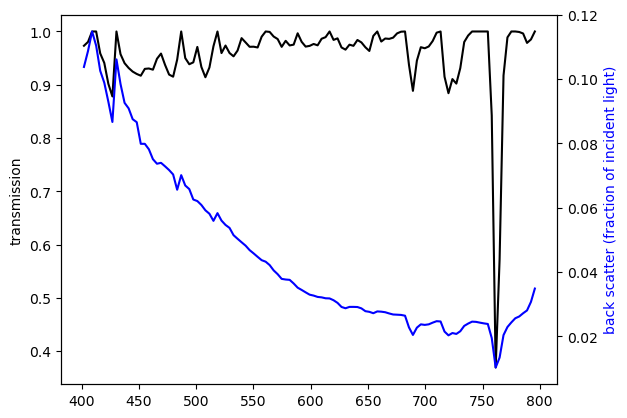

In [139]:
# plot the transmission and scattering vectors
fig, ax = plt.subplots(1)
ax.plot(wl,T, color='black')
ax.set_ylabel("transmission")
ax0 = ax.twinx()
ax0.set_ylabel("back scatter (fraction of incident light)", color='blue')
ax0.plot(wl,A, color='blue')

In [169]:
# normalize the whole cube
cube_norm = (cube - A) /T
cube_norm[sat] = np.nan

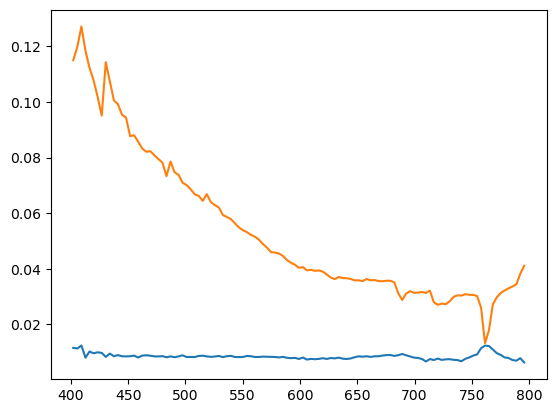

In [172]:
# compare a water pixel before and after atmospheric compensation
plt.plot(wl, cube_norm[400,600])
plt.plot(wl, cube[400,600])

In [ ]:
# plot the RGB representation of the whole image
rgb = np.zeros(cube_norm.shape[:2] + (3,))

In [ ]:
rgb[:,:,0] = cube_norm[:,:,65]
rgb[:,:,1] = cube_norm[:,:,47]
rgb[:,:,2] = cube_norm[:,:,20]
rgb*=20
rgb[rgb>1] =1
rgb[np.isnan(rgb)]=1

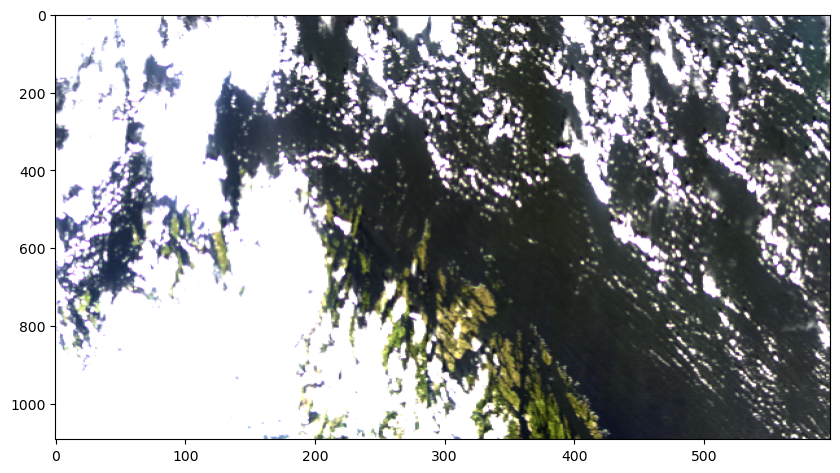

In [137]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(np.rot90(rgb), aspect=0.3)

In [153]:
def min_smoother(mins):
    mins_out = np.zeros_like(mins, dtype=np.float32)
    mins_out[0] = mins[0]
    for i in range(len(mins)-1):
        mins_out[i+1] = np.minimum(mins[i+1], mins_out[i])
    return mins_out

In [154]:
b = min_smoother(A)

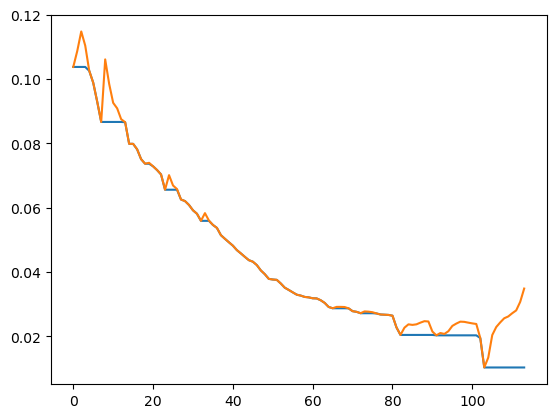

In [156]:
plt.plot(b)
plt.plot(A)

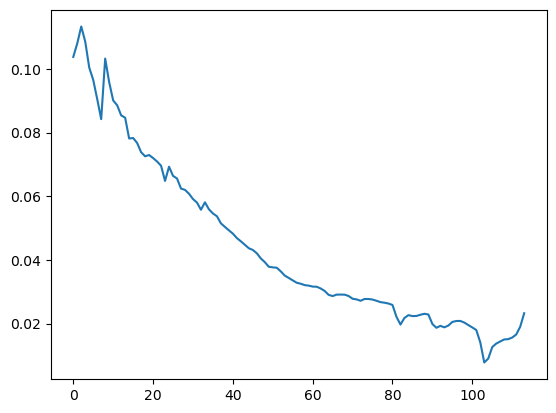

In [161]:
plt.plot(A)

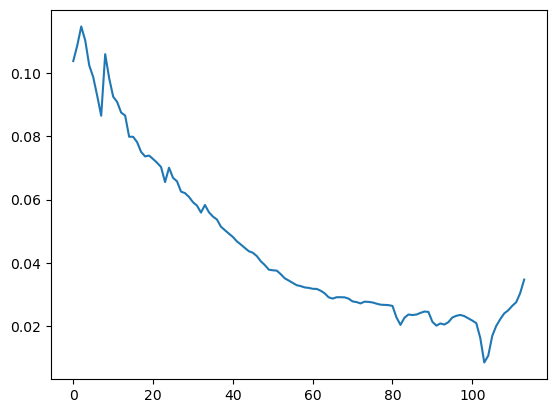

In [164]:
plt.plot(A)

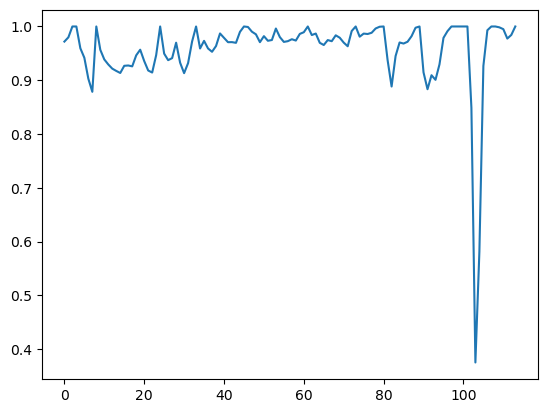

In [165]:
plt.plot(T)